# Preprocessing

In [0]:
#Imports
import numpy as np
import pandas as pd
import os
import json

#for handling latitude and longitude values
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

#for plots
import matplotlib.cm as cm
import matplotlib.colors as colors

#for maps
import folium

#for unpicking pickle files
import pickle

# Displaying Complete Data Frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


In [0]:
#please upload pickle file manually into sample data of the directory before running this.
df = pd.read_pickle("sample_data/time_converted_df.pickle")

In [0]:
df.head()

,EVENT_ID,EVENT_STATE,EVENT_CLASS,EVENT_TYPE,FACILITY_NAME,DIRECTION,ARTICLE_CODE,FROM_LOC_POINT,TO_LOC_POINT,CREATE_TIME,LAST_UPDATE,CLOSE_TIME,EVENT_DESCRIPTION,CITY,COUNTY,STATE,LAT,LON,TO_LAT,TO_LON,START_DATE,END_DATE,INCIDENT_IMPACT,UPDATE_NUMBER,WAZE_EVENT_ID,time
0,'2018110100002600005075',closed,incident,minor accident,I-30 E,Eastbound,NaN,NaN,NaN,11/1/2018 12:00:26 AM,11/1/2018 1:24:34 AM,11/1/2018 1:24:34 AM,Waze Alert: minor accident on I-30 E Eastbound (in Dallas),Dallas,Dallas,TX,32.791163,-96.749703,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:00:26
1,'2018110100181100005075',closed,incident,other,I-35E S,Southbound,NaN,NaN,NaN,11/1/2018 12:18:11 AM,11/1/2018 1:02:35 AM,11/1/2018 1:02:35 AM,Waze Alert: other on I-35E S Southbound (in Glenn Heights),Glenn Heights,Dallas,TX,32.559553,-96.822538,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:18:11
2,'2018110100210000005075',closed,incident,road closed,Warren Pkwy,Northbound,NaN,NaN,NaN,11/1/2018 12:21:00 AM,11/1/2018 10:22:58 PM,11/2/2018 9:00:52 AM,Waze Alert: road closed on Warren Pkwy Northbound (in Frisco) ; per 249,Frisco,Collin,TX,33.109015,-96.802718,0,0,NaN,NaN,NaN,1,NaN,2018-11-01 00:21:00
3,'2018110100222500005075',closed,incident,stopped car on the shoulder,I-820 E,Eastbound,NaN,NaN,NaN,11/1/2018 12:22:25 AM,11/1/2018 1:08:33 AM,11/1/2018 1:08:33 AM,Waze Alert: stopped car on the shoulder on I-820 E Eastbound (in Fort Worth),Fort Worth,Tarrant,TX,32.839193,-97.294523,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:22:25
4,'2018110100234000005075',closed,incident,traffic jam,Warren Pkwy,NaN,NaN,NaN,Ohio Dr,11/1/2018 12:23:40 AM,11/1/2018 12:23:40 AM,11/1/2018 11:00:57 AM,Waze Slowdown: traffic jam on Warren Pkwy (in Frisco),Frisco,Collin,TX,33.109015,-96.802718,33.109003,-96.80129,NaN,NaN,NaN,0,NaN,2018-11-01 00:23:40


In [0]:
df['LAT']=df[['LAT']].astype(float)
df['LON']=df[['LON']].astype(float)

In [0]:
# Deleting null values
df=df.dropna(subset=['LAT', 'LON','CITY'])
df.isnull().sum()

EVENT_ID             0      
EVENT_STATE          0      
EVENT_CLASS          0      
EVENT_TYPE           0      
FACILITY_NAME        19172  
DIRECTION            1638009
ARTICLE_CODE         2940404
FROM_LOC_POINT       2940404
TO_LOC_POINT         1490575
CREATE_TIME          0      
LAST_UPDATE          0      
CLOSE_TIME           13     
EVENT_DESCRIPTION    0      
CITY                 0      
COUNTY               0      
STATE                0      
LAT                  0      
LON                  0      
TO_LAT               0      
TO_LON               0      
START_DATE           2957956
END_DATE             2957956
INCIDENT_IMPACT      2957956
UPDATE_NUMBER        0      
WAZE_EVENT_ID        2914039
time                 0      
dtype: int64

### Identifying unique events from the data set

In [0]:
df['EVENT_TYPE'].unique().tolist()

['minor accident',
 'other',
 'road closed',
 'stopped car on the shoulder',
 'traffic jam',
 'major event',
 'pothole',
 'missing sign on the shoulder',
 'stopped car',
 'hazard on the shoulder',
 'accident',
 'flooding',
 'road construction',
 'stopped traffic',
 'object on roadway',
 'animal struck',
 'heavy traffic',
 'small traffic jam',
 'slowdown',
 'large traffic jam',
 'traffic heavier than normal',
 'malfunctioning traffic light',
 'medium traffic jam',
 'hazard on road',
 'animal on the shoulder',
 'weather hazard',
 'road closed due to construction',
 'hail',
 'ice on roadway',
 'fog',
 'road closed due to hazard',
 'huge traffic jam']

In [0]:
#Fetching accident events
df_accident=df[df['EVENT_TYPE']=='accident'].reset_index(drop=True)
print (df_accident.shape)
df_accident.head(2)

(23395, 26)


,EVENT_ID,EVENT_STATE,EVENT_CLASS,EVENT_TYPE,FACILITY_NAME,DIRECTION,ARTICLE_CODE,FROM_LOC_POINT,TO_LOC_POINT,CREATE_TIME,LAST_UPDATE,CLOSE_TIME,EVENT_DESCRIPTION,CITY,COUNTY,STATE,LAT,LON,TO_LAT,TO_LON,START_DATE,END_DATE,INCIDENT_IMPACT,UPDATE_NUMBER,WAZE_EVENT_ID,time
0,'2018110100581800005075',closed,incident,accident,I-35E N,Northbound,NaN,NaN,NaN,11/1/2018 12:58:18 AM,11/1/2018 1:30:35 AM,11/1/2018 1:30:35 AM,Waze Alert: accident on I-35E N Northbound,Carrollton,Dallas,TX,32.966111,-96.918126,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:58:18
1,'2018110102514400005075',closed,incident,accident,US-75 S,Northbound,NaN,NaN,NaN,11/1/2018 2:51:44 AM,11/1/2018 3:22:35 AM,11/1/2018 3:22:35 AM,Waze Alert: accident on US-75 S Northbound,Plano,Collin,TX,33.051265,-96.697335,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 02:51:44


In [0]:
df_sample=df[['EVENT_TYPE', 'LAT']]
df_sample.head(2)

,EVENT_TYPE,LAT
0,minor accident,32.791163
1,other,32.559553


In [0]:
df_sample.set_index(['LAT'],inplace=True)
df_sample.head(2)

,EVENT_TYPE
LAT,
32.791163,minor accident
32.559553,other


In [0]:
#joining all events against latitude
event_result=df_sample.groupby(level=['LAT'], sort=False).agg(','.join)

In [0]:
event_result.head()

,EVENT_TYPE
LAT,
32.791163,"minor accident,stopped car on the shoulder,heavy traffic,slowdown,heavy traffic,heavy traffic,major event,major event,traffic heavier than normal,heavy traffic,stopped traffic,heavy traffic,stopped traffic,stopped car,heavy traffic"
32.559553,other
33.109015,"road closed,traffic jam,traffic jam,road closed,traffic jam,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road construction,road construction,road closed due to construction,road closed due to construction,traffic jam,traffic jam,traffic jam"
32.839193,"stopped car on the shoulder,stopped traffic,stopped car on the shoulder,stopped car on the shoulder"
32.741511,major event


In [0]:
event_result=event_result.reset_index()
event_result.head()

,LAT,EVENT_TYPE
0,32.791163,"minor accident,stopped car on the shoulder,heavy traffic,slowdown,heavy traffic,heavy traffic,major event,major event,traffic heavier than normal,heavy traffic,stopped traffic,heavy traffic,stopped traffic,stopped car,heavy traffic"
1,32.559553,other
2,33.109015,"road closed,traffic jam,traffic jam,road closed,traffic jam,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road construction,road construction,road closed due to construction,road closed due to construction,traffic jam,traffic jam,traffic jam"
3,32.839193,"stopped car on the shoulder,stopped traffic,stopped car on the shoulder,stopped car on the shoulder"
4,32.741511,major event


In [0]:
event_result.shape

(552494, 2)

### Now creating a column 'EVENT' om the basis of accident chances in the 'EVENT_TYPE' Feature

In [0]:
event_result['EVENT'] =[1 if "accident" in x  else 0 for x in event_result['EVENT_TYPE']]

In [0]:
event_result.head(5)

,LAT,EVENT_TYPE,EVENT
0,32.791163,"minor accident,stopped car on the shoulder,heavy traffic,slowdown,heavy traffic,heavy traffic,major event,major event,traffic heavier than normal,heavy traffic,stopped traffic,heavy traffic,stopped traffic,stopped car,heavy traffic",1
1,32.559553,other,0
2,33.109015,"road closed,traffic jam,traffic jam,road closed,traffic jam,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,traffic jam,road closed,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road closed,road closed,traffic jam,traffic jam,road construction,road construction,road closed due to construction,road closed due to construction,traffic jam,traffic jam,traffic jam",0
3,32.839193,"stopped car on the shoulder,stopped traffic,stopped car on the shoulder,stopped car on the shoulder",0
4,32.741511,major event,0


In [0]:
#merging events against longitude
df2_sample=df[['EVENT_TYPE', 'LON']]
df2_sample.head(2)
df2_sample.set_index(['LON'],inplace=True)
event_result2=df2_sample.groupby(level=['LON'], sort=False).agg(','.join)
event_result2.head(2)
event_result2=event_result2.reset_index()
event_result2.head(2)

,LON,EVENT_TYPE
0,-96.749703,"minor accident,traffic jam,traffic jam,traffic jam,traffic jam,traffic jam,traffic jam,traffic jam,major event,major event,traffic heavier than normal,traffic jam,traffic jam,heavy traffic,traffic jam,traffic jam,traffic jam,traffic jam,road construction,traffic jam,traffic jam"
1,-96.822538,"other,stopped car on the shoulder,stopped car on the shoulder,stopped car on the shoulder,traffic heavier than normal,stopped car on the shoulder,stopped car on the shoulder,stopped car on the shoulder,slowdown,stopped car on the shoulder,traffic heavier than normal,traffic heavier than normal,stopped car on the shoulder,stopped car on the shoulder,heavy traffic,heavy traffic,stopped car on the shoulder,stopped car on the shoulder,stopped car on the shoulder,other,heavy traffic,stopped car on the shoulder,stopped car on the shoulder,stopped car on the shoulder,stopped traffic,stopped car on the shoulder"


In [0]:
event_result2.shape

(668872, 2)

### Comparing the size of two new dataframes based on Latitude and Longitude, its obvious that Longitudes are common, thats why the size of that dataframe is large. We will only persue data for latitude and then merges with longitudes of real data. The latitude dataframe will be enough to predict the accident risks.

In [0]:
#Comparing size of latitude and longitude dfs. we use latitude df to predict accident risks
event_result.rename(columns={'EVENT_TYPE':'EVENT TYPE','LAT':'lat', 'EVENT':'ACCIDENT_RISK'},inplace=True)
frame1=[df,event_result]
frames_main=pd.concat(frame1, axis=1, sort=False)
frames_main.head()

In [0]:
frames_main.drop(['lat', 'EVENT_TYPE'], axis=1, inplace=True)
frames_main.head(2)

,EVENT_ID,EVENT_STATE,EVENT_CLASS,FACILITY_NAME,DIRECTION,ARTICLE_CODE,FROM_LOC_POINT,TO_LOC_POINT,CREATE_TIME,LAST_UPDATE,CLOSE_TIME,EVENT_DESCRIPTION,CITY,COUNTY,STATE,LAT,LON,TO_LAT,TO_LON,START_DATE,END_DATE,INCIDENT_IMPACT,UPDATE_NUMBER,WAZE_EVENT_ID,time,EVENT TYPE,ACCIDENT_RISK
0,'2018110100002600005075',closed,incident,I-30 E,Eastbound,NaN,NaN,NaN,11/1/2018 12:00:26 AM,11/1/2018 1:24:34 AM,11/1/2018 1:24:34 AM,Waze Alert: minor accident on I-30 E Eastbound (in Dallas),Dallas,Dallas,TX,32.791163,-96.749703,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:00:26,"minor accident,stopped car on the shoulder,heavy traffic,slowdown,heavy traffic,heavy traffic,major event,major event,traffic heavier than normal,heavy traffic,stopped traffic,heavy traffic,stopped traffic,stopped car,heavy traffic",1.0
1,'2018110100181100005075',closed,incident,I-35E S,Southbound,NaN,NaN,NaN,11/1/2018 12:18:11 AM,11/1/2018 1:02:35 AM,11/1/2018 1:02:35 AM,Waze Alert: other on I-35E S Southbound (in Glenn Heights),Glenn Heights,Dallas,TX,32.559553,-96.822538,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:18:11,other,0.0


In [0]:
#considering two dfs EVENT TYPE and ACCIDENT_RISK
main=frames_main[['EVENT TYPE', 'ACCIDENT_RISK']]
main.rename(columns={'EVENT TYPE':'EVENT_TYPE'},inplace=True)
main.head(1)
# missing data
main.isnull().sum()
main=main.dropna(subset=['EVENT_TYPE', 'ACCIDENT_RISK'])
main.isnull().sum()
main['EVENT_TYPE'] = main['EVENT_TYPE'].astype('category')
main['EVENT_TYPE'] = main['EVENT_TYPE'].cat.codes
main.head()
main['EVENT_TYPE'] = main['EVENT_TYPE'].astype(int)

# Model 

In [0]:
# split into input and output variables
X = main['EVENT_TYPE'].values
Y = main['ACCIDENT_RISK'].values
X=X/max(X) #normalizing events
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
from sklearn.model_selection import train_test_split
seed = 20
np.random.seed(seed)

# training and test data distribution 80:20
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.20, random_state=seed)

# Model
model = Sequential()
model.add(Dense(1, input_dim=1, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model validation
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=512)

# Plots for Accuracy and Loss

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


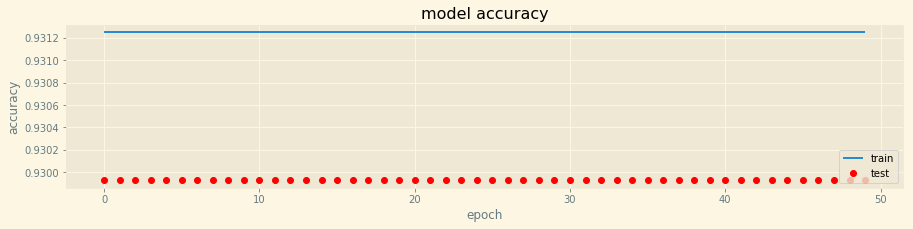

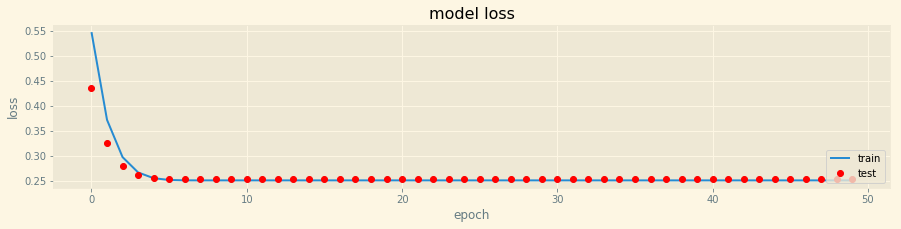

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,3)
print(history.history.keys())
with plt.style.context('Solarize_Light2'):
  #Accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'],'ro')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()
  #loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'],'ro')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

##Visualization - Clustered Markers denote the accidents.

In [0]:
#New dataframes for lat and long just to make sure they are coherent.
#taking 10000 rows as a sample set.
df_accident1=df_accident.head(10000)
df_without_accident1=df_without_accident.head(10000)

In [0]:
from folium.plugins import FastMarkerCluster
# Map coordinates
latitude = 31.8160381
longitude = -99.5120986
map_location = folium.Map(location=[latitude,longitude], tiles = 'http://tile.stamen.com/terrain/{z}/{x}/{y}.jpg', attr="toner-bcg", zoom_start= 8)
event_accident = folium.map.FeatureGroup()
latitudes = list(df_accident1.LAT)
longitudes = list(df_accident1.LON)
labels = list(df_accident1.EVENT_TYPE)

FastMarkerCluster(data=list(zip(df_accident1.LAT.values, df_accident1.LON.values))).add_to(map_texas)
folium.LayerControl().add_to(map_location)
map_location.add_child(event_accident)
map_location